# Principal Component Analysis (PCA)

In this notebook we manually determined some descriptive parameters for the spike waveforms and we applied PCA on these variables.

Below we import the necessary packages and set the default plotsize for `matplotlib`.

In [1]:
%pylab inline
from matplotlib import pyplot as plt
import pickle
import numpy as np
import seaborn  as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams["figure.figsize"] = (12, 6) # (w, h)

Populating the interactive namespace from numpy and matplotlib


Loading the previously calculated data from pickle files on disk.

In [2]:
with open('./spike_waveform_data.pickle', 'rb') as f:
        data=pickle.load(f)
with open('./spike_waveform_labels.pickle', 'rb') as f:
        label=pickle.load(f)

In [3]:
sample_count = 10000  # number of waves to visualize
stride = 10  # every nth wave to visulize

# truncate the data
signals = data[0:sample_count:stride]
labels = label[0:sample_count:stride]

Text(0.5, 1.0, 'Spike waveforms (color coded by origin)')

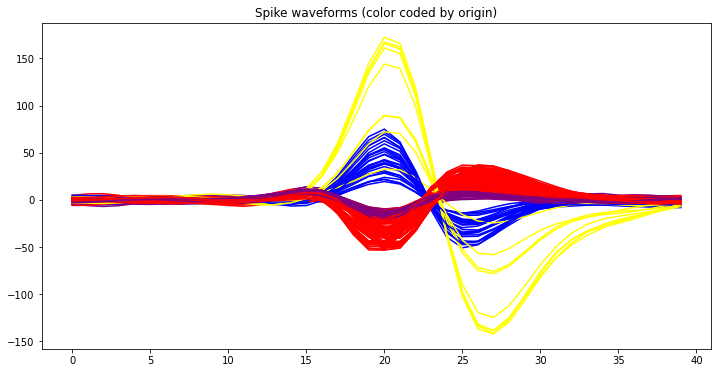

In [4]:
color_L = "black red blue green yellow purple pink cyan".split()
skip_count = 5

# plot individual
for d, l in zip(signals[::skip_count], labels[::skip_count]):
    plt.plot(d, color=color_L[l], label=l)
plt.title("Spike waveforms (color coded by origin)")

After this we manually determined and calculated some descriptive variables about the waves and put them into Pandas `DataFrame`s.

In [5]:
# MINIMUM
min_idx = [ np.argmin(e) for e in signals ]
min_val = [ e[i] for e, i in zip(signals, min_idx) ]
# MAXIMUM
max_idx = [ np.argmax(e) for e in signals ]
max_val = [ e[i] for e, i in zip(signals, max_idx) ]
# MIN and MAX DIFFERENCE (steeoest points on the wave)
maxdiff_idx = [ np.argmax(np.diff(e)) for e in signals ]
maxdiff_val = [ e[i] for e, i in zip(signals, maxdiff_idx) ]

mindiff_idx = [ np.argmin(np.diff(e)) for e in signals ]
mindiff_val = [ e[i] for e, i in zip(signals, mindiff_idx) ]

df = pd.DataFrame({
    "label": labels,
    "min_idx": min_idx,
    "max_idx": max_idx,
    "min_val": min_val,
    "max_val": max_val,
    "maxdiff_idx": maxdiff_idx,
    "maxdiff_val": maxdiff_val,
    "mindiff_idx": mindiff_idx,
    "mindiff_val": mindiff_val,
    })

df["minmax_val"] = df["max_val"] - df["min_val"]
df["minmax_idx"] = df["max_idx"] - df["min_idx"]

df

,label,min_idx,max_idx,min_val,max_val,maxdiff_idx,maxdiff_val,mindiff_idx,mindiff_val,minmax_val,minmax_idx
0,2,25,20,-45.567871,71.939529,17,23.284443,22,30.905416,117.507401,-5
1,1,20,25,-52.543518,34.003914,21,-36.185894,17,-13.006968,86.547432,5
2,1,20,26,-22.526266,18.768873,22,-5.848909,17,-4.441033,41.295139,6
3,2,25,20,-28.412605,42.284927,17,12.243852,22,16.123854,70.697533,-5
4,2,25,20,-42.252796,63.624802,17,21.027357,22,27.981878,105.877598,-5
...,...,...,...,...,...,...,...,...,...,...,...
995,1,20,26,-49.132614,32.912548,22,-32.849178,18,-15.066400,82.045162,6
996,5,20,15,-17.294918,10.769435,22,-7.535276,17,4.221006,28.064353,-5
997,5,20,15,-15.810220,8.488471,21,-11.683597,17,2.755006,24.298691,-5
998,1,20,26,-47.600254,33.137226,22,-31.822311,18,-13.835086,80.737480,6


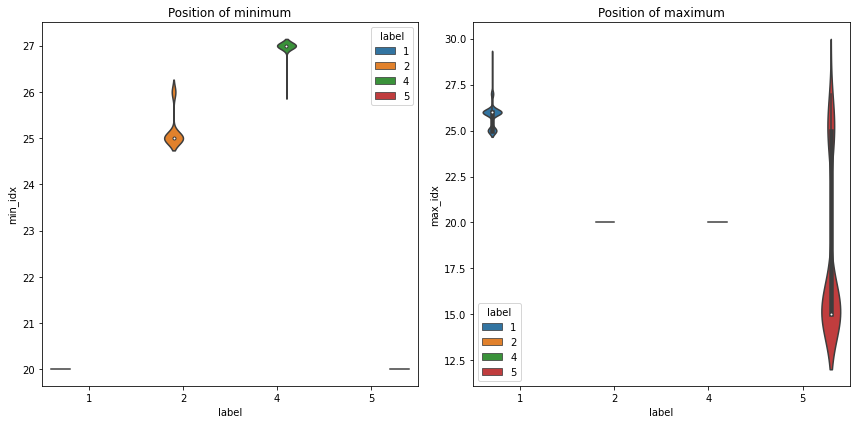

In [6]:
f, axes = plt.subplots(1, 2)

sns.violinplot(x="label", y="min_idx", data=df,
    hue="label", ax=axes[0]
)
axes[0].set_title("Position of minimum")

sns.violinplot(x="label", y="max_idx", data=df,
    hue="label", ax=axes[1]
)
axes[1].set_title("Position of maximum")
plt.tight_layout()

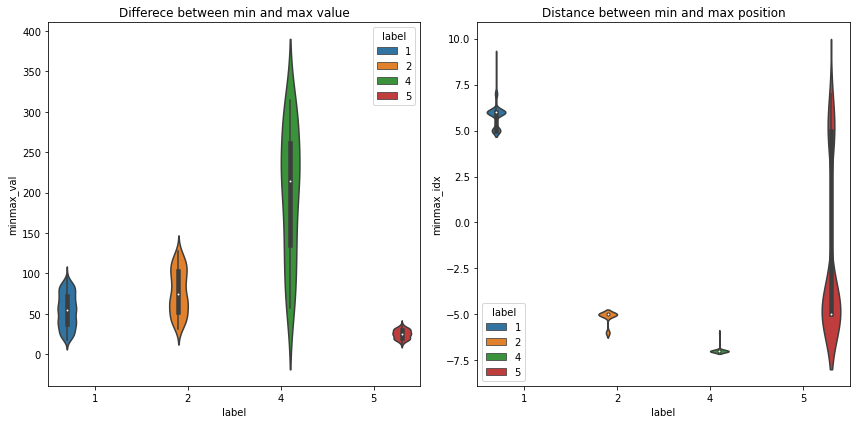

In [7]:
f, axes = plt.subplots(1, 2)

df["minmax_val"] = df["max_val"] - df["min_val"]
df["minmax_idx"] = df["max_idx"] - df["min_idx"]

sns.violinplot(x="label", y="minmax_val", data=df,
    hue="label", ax=axes[0]
)
axes[0].set_title("Differece between min and max value")

sns.violinplot(x="label", y="minmax_idx", data=df,
    hue="label", ax=axes[1]
)
axes[1].set_title("Distance between min and max position")
plt.tight_layout()

Below is the actual determination of the PCA components.
We reduced the dimensions into 2D to be able to plot it.

Based on [this](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [8]:

features = ["min_val", "max_val", "maxdiff_idx", "maxdiff_val", "mindiff_idx", "mindiff_val", ]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
# np.isnan(x).any()

print(np.isnan(x).any())
print(np.isinf(x).any())

False
False


In [11]:
# in case of error, run twice (strange, I know)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

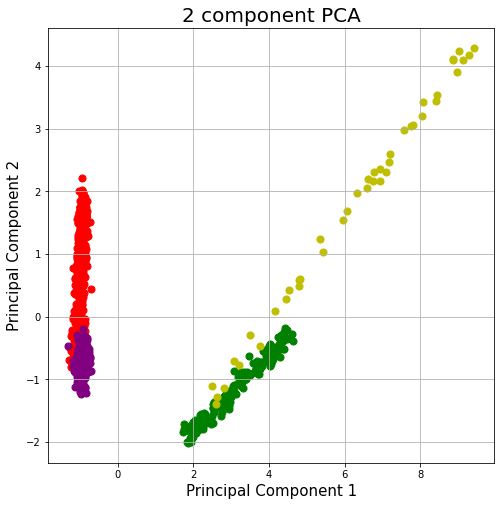

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b', 'y', 'purple', 'cyan', 'black', 'gray','violet', 'orange']
targets = [1,2,3,4,5,6,7,8,9,10]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.grid()

Here we can see that PCA can be very helpful to sort the waves if we apply it to our manually selected descriptors.
Below we can see a clustermap for these values.

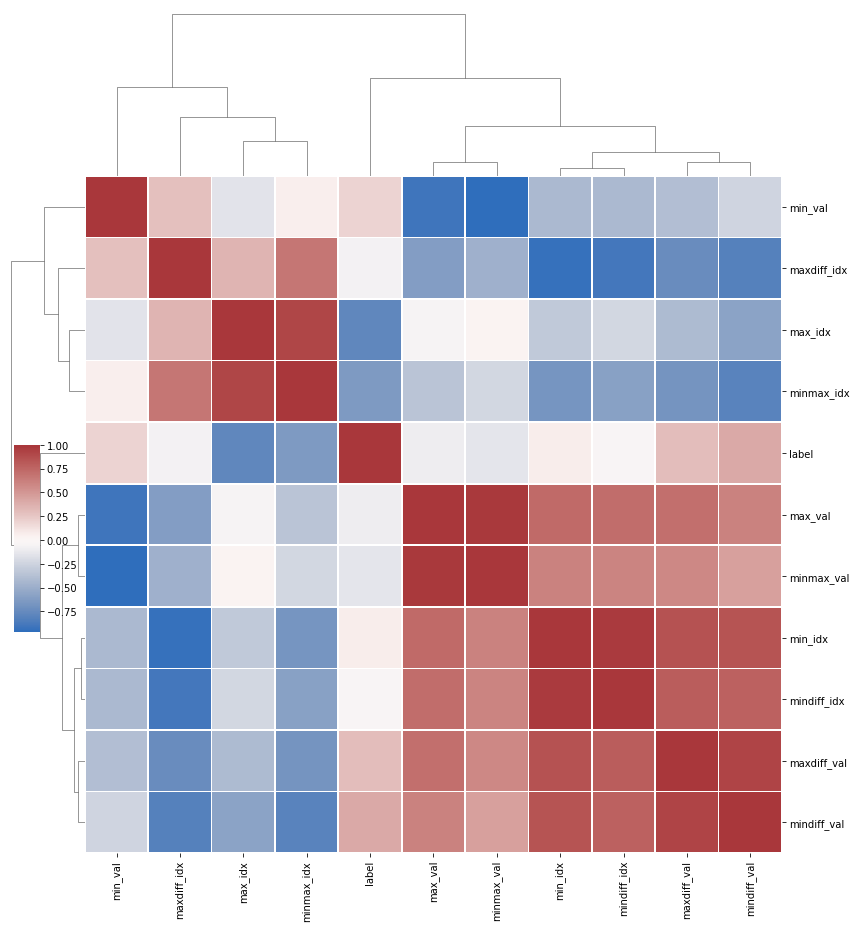

In [17]:
sns.clustermap(df.corr(), center=0, cmap="vlag",
                #    row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

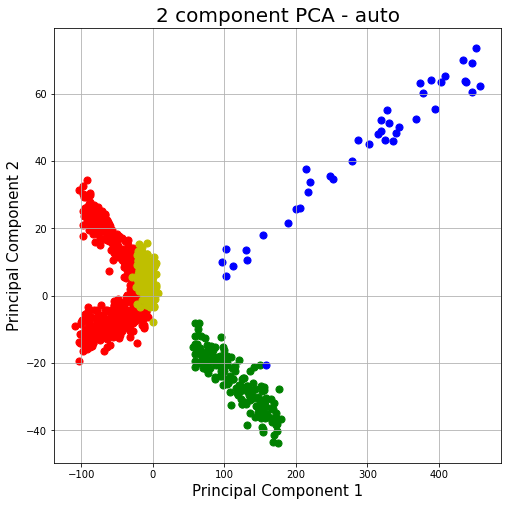

In [15]:
# Separating out the features
x = pd.DataFrame.from_records( signals )

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - auto', fontsize = 20)



for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.grid()